# 1. Introduction: Plinko Analysis

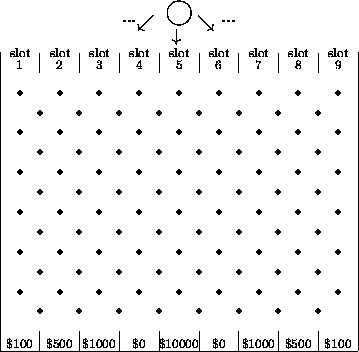
### 1.1 Imports

The Plinko module also imports the numpy, matplotlib, and random libraries

In [1]:
from plinko import *

# Data manipulation along with numpy
import pandas as pd

# Statistical analysis
import scipy
from scipy.special import comb

# Data visualization
import matplotlib

%matplotlib inline

print("Numpy: ", np.__version__)
print("Pandas: ", pd.__version__)
print("Matplotlib: ", matplotlib.__version__)
print("Scipy: ", scipy.__version__)

Numpy:  1.17.4
Pandas:  0.25.3
Matplotlib:  3.1.1
Scipy:  1.3.1


# 2. Analysis/Modeling


### 2.1 Simulation
Creating a simulation of Plinko

In [2]:
print(get_board())  # The plinko board, a-i in the 13th row represents the money

[['A' 'o' 'B' 'o' 'C' 'o' 'D' 'o' 'E' 'o' 'F' 'o' 'G' 'o' 'H' 'o' 'I']
 ['o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['a' '|' 'b' '|' 'c' '|' 'd' '|' 'e' '|' 'f' '|' 'g' '|' 'h' '|' 'i']]


Creating the Plinko puck object 

In [3]:
plinko_puck = PlinkoPuck("E")  # slot A and path P
plinko_puck.run_simulation(True)  # True to show the path

[['A' 'o' 'B' 'o' 'C' 'o' 'D' 'o' 'E' 'o' 'F' 'o' 'G' 'o' 'H' 'o' 'I']
 ['o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o']
 [' ' 'o' ' ' 'o' ' ' 'o' ' ' 'o' ' ' 'P' ' ' 'o' ' ' 'o' ' ' 'o' ' ']
 ['a' '|' 'b' '|' 'c' '|' 'd' '|' 'P' '|' 'f' '|' 'g' '|' 'h' '|' 'i']]


(array([13]), array([8]))

### 2.2 Graphical Analysis
Let's try dropping 10000 Plink pucks for Slot E and graph the outcome.

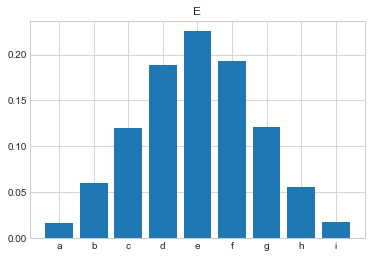

In [4]:
show_bar("E", 10000)

As we can see, the distribution seems to be normal. However, what is the best option to win the $10,000? Let's try graphing the probabilities for all the slots.

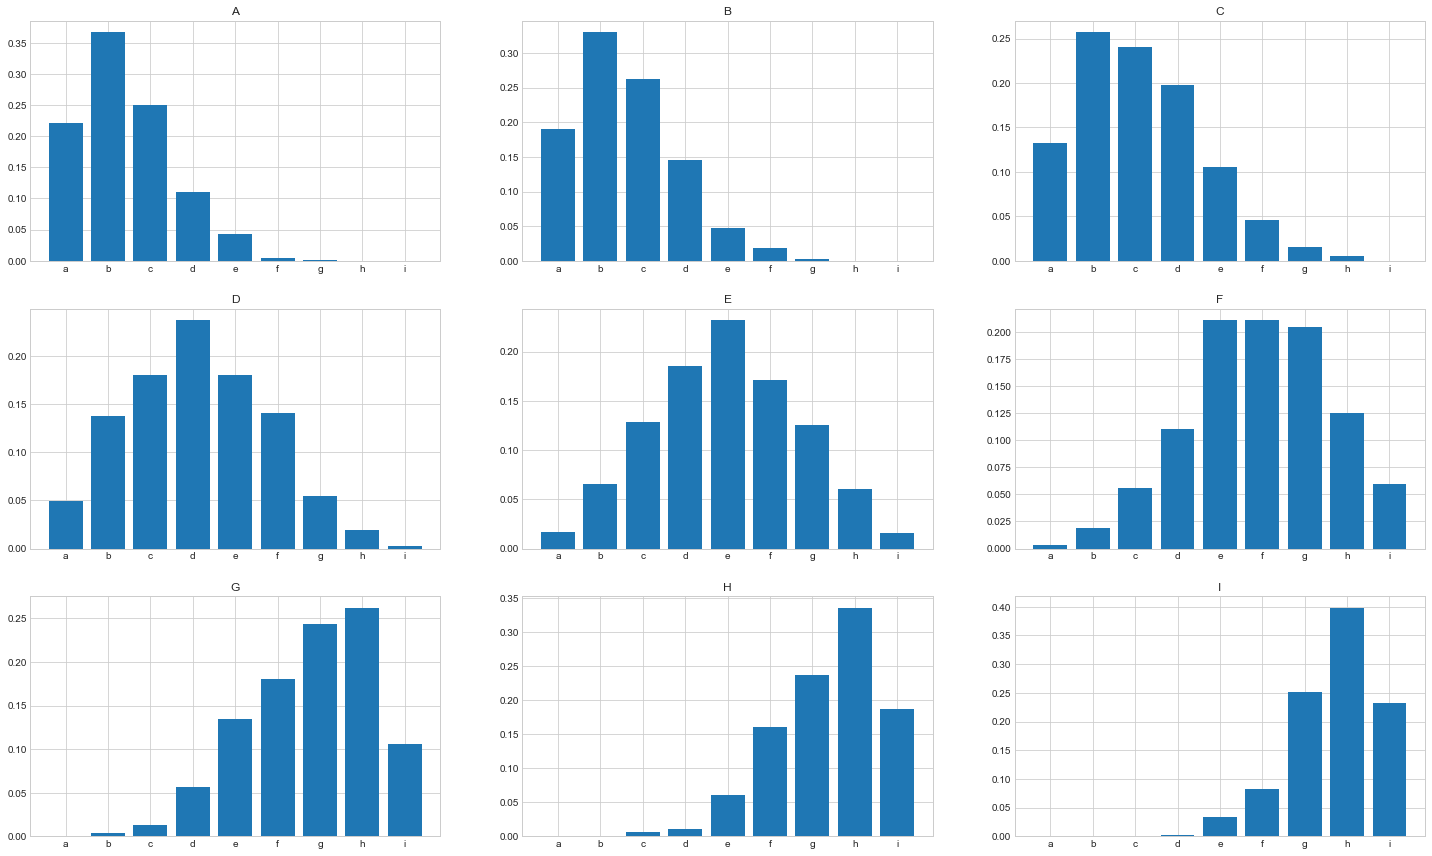

In [5]:
show_all_bars(1000)

It seems that placing the puck in Slot E will most profitable compared to all others. But let us be sure using the panda's dataframe.

# 3. Results

In [6]:
plinkos = [PlinkoPuck(chr(65 + i)) for i in range(9)]
list_of_dicts, idx = [], 0
for i in range(9):
    money_dict = {chr(ord("a") + i): 0 for i in range(9)}
    for j in range(100000):
        money_dict["".join(get_board()[plinkos[i].run_simulation()])] += 1
    list_of_dicts.append(money_dict)

probability = pd.DataFrame(list_of_dicts) / 100000
probability.columns = ["100", "500", "1,000", "0", "10,000", "0", "1,000", "500", "100"]
probability.rename(index={i: chr(65 + i) for i in range(9)}, inplace=True)
probability

,100,500,"1,000",0,"10,000",0,"1,000",500,100
A,0.22588,0.38404,0.24300,0.10841,0.03235,0.00585,0.00047,0.00000,0.00000
B,0.19350,0.34980,0.24302,0.13703,0.05731,0.01612,0.00303,0.00019,0.00000
C,0.12066,0.24693,0.24223,0.19669,0.12134,0.05345,0.01592,0.00253,0.00025
D,0.05394,0.13735,0.19477,0.22600,0.19427,0.12263,0.05194,0.01624,0.00286
E,0.01633,0.05755,0.11872,0.19401,0.22665,0.19274,0.12102,0.05674,0.01624
F,0.00285,0.01651,0.05356,0.12094,0.19344,0.22584,0.19500,0.13663,0.05523
G,0.00027,0.00319,0.01653,0.05344,0.12160,0.19572,0.24201,0.24721,0.12003
H,0.00000,0.00024,0.00268,0.01623,0.05703,0.13630,0.24986,0.34252,0.19514
I,0.00000,0.00000,0.00049,0.00639,0.03214,0.10703,0.24111,0.38629,0.22655


In [7]:
print("Maximum: ", probability["10,000"].max())  # The highest chance of getting $10,000
print("Minimum: ", probability["10,000"].min())  # The lowest chance of getting $10,000

Maximum:  0.22665
Minimum:  0.03214


In [8]:
print(probability.index[probability["10,000"] == probability["10,000"].max()])
print(probability.index[probability["10,000"] == probability["10,000"].min()])

Index(['E'], dtype='object')
Index(['I'], dtype='object')


Therefore, concluding the best chance to win $\$$10,000 is to drop it from slot E and the worst chance is dropping it from slot A or I. However, it seems very unproductive to create a simulation for every type of senario just to determine the probability of winning $\$$10,000. Perhaps there is a simpler way.

# 4. Binomial Distribution

Binomial Distribution Formula: $P(x) = \binom{n}{x}p^{x}q^{n-x}$

$n$ is the number of trials.

$x$ is the number of successes desired.

$p$ is the probability of success for $x$ trials.

$q = 1 - p$ is the probability of getting a failure for $x$ trials.

In [9]:
def binom_d(n, x, p):
    return comb(n, x) * p ** x * (1 - p) ** (n - x)


binom_d_list = [binom_d(12, i, 0.5) for i in range(2, 11)]
binom_series = pd.Series(binom_d_list)
binom_series.rename(
    index={
        i: j
        for i, j in enumerate(
            ["100", "500", "1,000", "0", "10,000", "0", "1,000", "500", "100"]
        )
    },
    inplace=True,
)
binom_series

100       0.016113
500       0.053711
1,000     0.120850
0         0.193359
10,000    0.225586
0         0.193359
1,000     0.120850
500       0.053711
100       0.016113
dtype: float64

In [10]:
probability.loc["E"]

100       0.01633
500       0.05755
1,000     0.11872
0         0.19401
10,000    0.22665
0         0.19274
1,000     0.12102
500       0.05674
100       0.01624
Name: E, dtype: float64

Percent Error: Simulation vs. Formula

In [11]:
pd.Series(
    [
        (abs(probability.loc["E"][i] - binom_series[i]) / abs(binom_series[i])) * 100
        for i in range(9)
    ],
    ["100", "500", "1,000", "0", "10,000", "0", "1,000", "500", "100"],
)

100       1.344970
500       7.147636
1,000     1.762198
0         0.336485
10,000    0.471688
0         0.320323
1,000     0.140994
500       5.639564
100       0.786424
dtype: float64

The error between the simulation and the exact value are relatively minimal. However, given the Law of Big Numbers if there were more trials then the error would most likely decrease.

# 5. Conclusion

Overall, the Plinko simulation was quite accurate in determining the best result in winning $\$$10,000 is to drop the puck from slot E, giving it ~23% chance of succeeding.